<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Axial-symmetrical-problems,-without-body-force" data-toc-modified-id="Axial-symmetrical-problems,-without-body-force-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Axial symmetrical problems, without body force</a></span><ul class="toc-item"><li><span><a href="#Basic-equations" data-toc-modified-id="Basic-equations-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Basic equations</a></span></li><li><span><a href="#The-general-solution-for-1D-biharmonic-equation" data-toc-modified-id="The-general-solution-for-1D-biharmonic-equation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>The general solution for 1D biharmonic equation</a></span></li><li><span><a href="#General-formulas-for-stresses" data-toc-modified-id="General-formulas-for-stresses-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>General formulas for stresses</a></span></li><li><span><a href="#General-formulas-for-strains" data-toc-modified-id="General-formulas-for-strains-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>General formulas for strains</a></span></li><li><span><a href="#General-formulas-for-displacements" data-toc-modified-id="General-formulas-for-displacements-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>General formulas for displacements</a></span></li><li><span><a href="#Example:-pressurized-disks-and-cylinders" data-toc-modified-id="Example:-pressurized-disks-and-cylinders-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Example: pressurized disks and cylinders</a></span><ul class="toc-item"><li><span><a href="#Case-I:-the-simplest-case" data-toc-modified-id="Case-I:-the-simplest-case-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Case I: the simplest case</a></span></li><li><span><a href="#Case-II:--pressurized-disks-and-cylinders" data-toc-modified-id="Case-II:--pressurized-disks-and-cylinders-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Case II:  pressurized disks and cylinders</a></span><ul class="toc-item"><li><span><a href="#Stress-solution" data-toc-modified-id="Stress-solution-5.6.2.1"><span class="toc-item-num">5.6.2.1&nbsp;&nbsp;</span>Stress solution</a></span></li><li><span><a href="#Some-important-findings-from-the-stress-solution" data-toc-modified-id="Some-important-findings-from-the-stress-solution-5.6.2.2"><span class="toc-item-num">5.6.2.2&nbsp;&nbsp;</span>Some important findings from the stress solution</a></span></li><li><span><a href="#Displacement-solution" data-toc-modified-id="Displacement-solution-5.6.2.3"><span class="toc-item-num">5.6.2.3&nbsp;&nbsp;</span>Displacement solution</a></span></li></ul></li></ul></li></ul></li></ul></div>

Let us import necessary external modules or dependence for later use in this chapter.

In [1]:
# Place curse in this cell, and press Ctrl+Enter to import dependences. 
import sys                         # for accessing the computer system
sys.path.append('../grbin/')  # Change to the directory in your system 

from commonImports import *      # Import dependences from '../grbin/'
import grcodes as gr                 # Import the module of the author
#importlib.reload(gr)            # When grcodes is modified, reload it

from continuum_mechanics import vector 
from continuum_mechanics.solids import sym_grad, strain_stress
init_printing(use_unicode=True)      # For latex-like quality printing 
np.set_printoptions(precision=4,suppress=True)  # Digits in print-outs

## Axial symmetrical problems, without body force

### Basic equations

In engineering applications, many structure components are made of axial symmetric. For example, types of disks. For these problems, the solution procedure can be simplified:

1. All the variables do not depend on $\theta$.

2. The displacement component $u_{𝜃}$ vanishes, because it is not axial symmetric. 

3. The shear stress $𝜎_{r𝜃}$ vanishes, because it is not axial symmetric. 

Under these conditions, the relationship between the stresses and stress-function is reduced to 

\begin{equation} \label{eqSSpsy}
\begin{split}
𝜎_{rr} &=\frac{1}{r}\frac{∂𝜙}{∂ r} \\
𝜎_{𝜃𝜃} &=\frac{∂^2𝜙}{∂ r^2}
\end{split}
\end{equation}

The biharmonic of the stress-function is simplified and its compatibility equation is reduced to 

\begin{equation} \label{eq4phisy}
\begin{split}
\nabla^4𝜙 &= \nabla^2\nabla^2𝜙 =\bigg(\frac{\partial^2 }{\partial r^2}   + \frac{1 }{r}\frac{\partial }{\partial r} \bigg) \bigg(\frac{\partial^2 𝜙}{\partial r^2}   + \frac{1 }{r}\frac{\partial 𝜙}{\partial r} \bigg) \\
&=\frac{∂^4𝜙}{∂r^4} + \frac{2 }{r} \frac{∂^3𝜙}{∂r^3}  - \frac{1}{r^2}\frac{∂^2𝜙}{∂r^2} 
 +\frac{1}{r^3}\frac{∂𝜙}{∂r}  = 0
\end{split}
\end{equation} 

This is a 1D 4th order differential equation (DE) with only one independent variable $r$. It has an interesting chained differential form: 

\begin{equation} \label{eq4phichb}
\nabla^4𝜙 =\frac{d }{d r} \left\{ r\frac{d }{d r} 
\left[\frac{1}{r} \frac{d }{d r} \bigg( r\frac{d 𝜙}{d r} \bigg) \right] \right\} =0
\end{equation} 

This chained structure allows us to integrate it in stages to find the solution for the stress function, which can be done by hand. It is even easier using Sympy, which is what we will do. 

Below is a Sympy code that solves Eq.(\ref{eq4phisy}) directly. 

In addition, the strain-displacement relation is reduced to:    

\begin{equation} \label{eqErt}
\begin{split}
ε_{rr}&=\frac{\partial u_r}{\partial r}\\
ε_{𝜃𝜃}&=\frac{ u_r}{r}\\
2ε_{r𝜃}&=0
\end{split}
\end{equation} 

### The general solution for 1D biharmonic equation

We use Sympy to obtain directly the general solution for the 1D 4th biharmic DE, Eq.(\ref{eq4phisy}).

In [2]:
# Solve ∇^4𝜙=0 for general solution:
r = sp.symbols('r', nonnegative=True)       # define symbolic variable
𝜙 = sp.Function('𝜙')(r)                  # define the stress function
lap = diff(diff(𝜙,r),r)+(1/r)*diff(𝜙, r)  # define Laplacian operator
bih = diff(diff(lap,r),r)+ (1/r)*diff(lap,r)     #bi-harmonic operator

diff_eq = sp.Eq(bih, 0)                 # define differential equation

g_sln = sp.dsolve(diff_eq, 𝜙)        # solve the differential equation

gr.printM(g_sln, 'The general solution to ∇^4𝜙=0 with constants')

The general solution to ∇^4𝜙=0 with constants


This is the general expression for stress function for problems without body force. It has 4 arbitrary constants. We can reset the constants, for consistence in author's notation convention (reader may do this differently or leave it as it is). Because these constants are to be determined later, their notation is immaterial. We thus write: 

\begin{equation} \label{eqPhiSln}
 \phi(r)= c_{0} \log{\left(r \right)} + c_{1} r^{2} \log{\left(r \right)} + c_{2} r^{2} + c_{3}
\end{equation}

The Python code is 

In [7]:
c0, c1, c2, c3 = symbols('c0, c1, c2, c3')      #integration constants
𝜙 = 𝑐0*sp.log(𝑟)+𝑐1*𝑟**2*sp.log(𝑟)+𝑐2*𝑟**2+𝑐3          #reset constants
𝜙

These 4 arbitrary constants can be determined based on the setting of the actual problem. 

### General formulas for stresses 

We can now compute stresses using Eq.(\ref{eqSSpsy}), which involves only differentiations. 

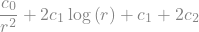

In [8]:
𝜎_rr = (diff(𝜙,r)/r).expand()                     # differentiate once
𝜎_rr

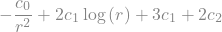

In [9]:
𝜎_𝜃𝜃 = (diff(diff(𝜙,r),r)).expand()              # differentiate twice
𝜎_𝜃𝜃

We obtain the general formulas for stresses for any axial symmetrical problem without body force: 

\begin{equation} \label{eqSaxsy}
\begin{split}
𝜎_{rr} &=\frac{1}{r}\frac{∂𝜙}{∂ r}= \frac{c_{0}}{r^{2}} + 2 c_{1} \log{\left(r \right)} + c_{1} + 2 c_{2} \\
𝜎_{𝜃𝜃} &=\frac{∂^2𝜙}{∂ r^2} =- \frac{c_{0}}{r^{2}} + 2 c_{1} \log{\left(r \right)} + 3 c_{1} + 2 c_{2} \\
𝜎_{r𝜃} &=0 
\end{split}
\end{equation}

### General formulas for strains 

Consider a plane stress problem. We can now obtain the general formulas for strains using the constitutive equation (with zero shear stress): 

\begin{equation} \label{eqESij2D4}
\varepsilon_{rr}=\frac{1}{E}(\sigma_{rr}-\nu\sigma_{𝜃𝜃})\\
\varepsilon_{𝜃𝜃}=\frac{1}{E}(\sigma_{𝜃𝜃}-\nu\sigma_{rr})\\
\varepsilon_{r𝜃}=0
\end{equation}

Note that the constitutive equation in polar coordinates is the same as that in the Cartesian coordinates. 

In [10]:
E, 𝜈 = symbols('E, 𝜈')                            # material constants
𝜀_rr = (𝜎_rr - 𝜈*𝜎_𝜃𝜃)/E
𝜀_rr

In [11]:
𝜀_𝜃𝜃 = (𝜎_𝜃𝜃 - 𝜈*𝜎_rr)/E
𝜀_𝜃𝜃

### General formulas for displacements

Using the 1st equation in Eq.(\ref{eqErt}), we obtain $\frac{\partial u_r}{\partial r}=ε_{rr}$, and hence we obtain $u_r$ by integrating once: 

In [12]:
C = symbols('C') 
u_r = sp.integrate(𝜀_rr,(r)) + C           # c is an integral constant
u_r

Next, using the 2nd equation in Eq.(\ref{eqErt}), we need $rε_{𝜃𝜃}-u_r=0$. However, $rε_{𝜃𝜃}-u_r$ is found as, 

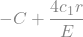

In [13]:
(r*𝜀_𝜃𝜃-u_r).simplify()                          # form ∂𝑢𝜃/∂𝜃

This gives:

\begin{equation} \label{eqCc1}
C=\frac{4 c_{1} r}{E}
\end{equation} 

Because $C$ can only be a constant. For Eq.(\ref{eqCc1}) to be satisfied, we must have $c_1=0$ and $C=0$. 

In [14]:
u_rg = u_r.subs({C:0, c1:0}).expand()
u_rg

Finally, we obtain the general expressions for displacements: 

\begin{equation} \label{equv}
\begin{split}
u_r&= -c_{0}\frac{(1+𝜈)}{E}\frac{1}{r} + 2c_{2}\frac{(1-𝜈)}{E}r \\
\end{split}
\end{equation} 

There are a total of 2 constants: $c_0$ and $c_2$. These need to be determined by the boundary conditions (BCs). 

Note that Eq.(\ref{equv}) is for 2D plane stress problems. If the problem is plane strain, for example a cylindrical long pipe, Eq.(\ref{equv}) is still valid via the following replacements. 

\begin{equation} \label{eqStrs2Strn}
\text{first: substitute } \; \nu \; \text{ by } \; \frac{\nu}{(1-\nu)}\\
\text{then: substitute } \; E \; \text{ by } \; \frac{E}{(1-\nu^2)}\\
\text{no change in } \; G
\end{equation}  

### Example: pressurized disks and cylinders 

Consider a disk that is subjected to internal pressure $p_i$ and pressure $p_o$ on the outer surface, as shown in Fig.\ref{image:Disk_p}. Assuming the body force is zero, determine the stresses and the displacement within the disk. 

<img src="./images/Disk_p.png" alt=" " width="250"/><br>
\begin{figure}
  \includegraphics[width=5cm]{}
  \caption{\label{image:Disk_p} A disk subjected to pressure at inner and outer surfaces.}
\end{figure}

This problem is clear axial symmetric, and the formulas given in the previous section can be used. 

Let us use Python to find the solutions in stresses. First, we need to find the stress function $\nabla^4\phi=0$, because the body force is zero. The general solution is given in Eq.(\ref{eqPhiSln}).

The general solution for the stresses are given in Eq.(\ref{eqSaxsy})


\begin{equation} \label{eqSaxsyb}
\begin{split}
𝜎_{rr} &=\frac{1}{r}\frac{∂𝜙}{∂ r}= \frac{c_{0}}{r^{2}} + c_{1} (2\log r + 1) + 2 c_{2} \\
𝜎_{𝜃𝜃} &=\frac{∂^2𝜙}{∂ r^2} =- \frac{c_{0}}{r^{2}} + c_{1} (2\log r + 3) + 2 c_{2} \\
𝜎_{r𝜃} &=0 
\end{split}
\end{equation}

This is the general formulas for stresses. It has 3 arbitrary constants, which can be determined based on the setting of the actual problem. We can consider a few cases. 

#### Case I: the simplest case 

If the axial symmetric domain does not have a hole in the center, $c_0$ and $c_1$ shall be zero, for a meaningful finite solution. In this case, the solution for the stresses are

\begin{equation} \label{eqSaxs1}
𝜎_{rr}  = 𝜎_{𝜃𝜃} = 2 c_{2} 
\end{equation}

They both are a constant. If the externally apply uniform stress is $𝜎$, we have $ 𝜎_{rr}=𝜎_{𝜃𝜃}=𝜎$. The constant $c_2$ is then found as $c_2=𝜎/2$. 

The displacement is found as:  

\begin{equation} \label{equvc1}
u_r= \frac{(1-𝜈)𝜎}{E} r  
\end{equation} 

It grows linearly with $r$. Equation (\ref{equvc1}) is very similar to the displacement for a 1D bar fixed one end, which is $u_x= \frac{𝜎}{E} x$. The only difference is the Poisson's effect. Because the disk is constrained within its plane, resulting a smaller displacement. 

#### Case II:  pressurized disks and cylinders

##### Stress solution

If there is a hole at the origin ($r=0$), other solutions possible. Let us find the solution. From the 2nd equation in Eq.(\ref{eqSaxsy}), we know that $c_1$ must be zero, because the term $ \frac{4 c_{1} r 𝜃}{E}$ is multi-valued. For example, if we set $𝜃=𝜃_1$ and $𝜃=𝜃_1+2\pi$ for any given $𝜃_1$ and $r$, we will have two different values for the displacement. This is not possible, because these two points are at the same location. Therefore, this kind of multiple valued term is not allowed for meaningful solutions. 

Setting $c_1=0$ in Eq.(\ref{eqSaxsy}), we have: 

\begin{equation} \label{eqSB0}
\begin{split}
𝜎_{rr} &= \frac{c_{0}}{r^{2}}  + 2 c_{2} \\
𝜎_{𝜃𝜃} &= - \frac{c_{0}}{r^{2}} + 2 c_{2} \\
𝜎_{r𝜃} &=0 
\end{split}
\end{equation}

We write the following code to determine these two constants, $c_0$ and $c_2$, using stress boundary conditions. Using Eq.(\ref{eqSB0}) we have: 

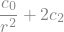

In [15]:
r = sp.symbols("r", nonnegative=True)
c0, c2 = sp.symbols("c0, c2")
𝜎_rr = c0/r**2 + 2*c2                # the general solution for stress
𝜎_rr

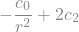

In [16]:
r = sp.symbols("r", nonnegative=True)
c0, c2 = sp.symbols("c0, c2")
𝜎_𝜃𝜃 = -c0/r**2 + 2*c2               # the general solution for stress
𝜎_𝜃𝜃

Because the disk is pressurized from both inner $r=a$ and outer $r=b$ surfaces, we have: 

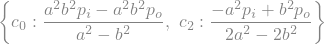

In [17]:
a, b, pi, po = sp.symbols("a, b, p_i, p_o")
cs=sp.solve([𝜎_rr.subs(r,a)+pi, 𝜎_rr.subs(r,b)+po],[c0,c2])
cs

We finally found these two constants that meet the conditions on both surfaces. By substituting these constants back to the expressions of the stresses, we obtain: 

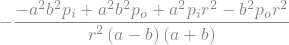

In [18]:
𝜎_rr = 𝜎_rr.subs({c0:cs[c0], c2:cs[c2]}).expand()
𝜎_rr.factor()

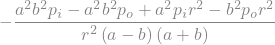

In [19]:
𝜎_𝜃𝜃 = 𝜎_𝜃𝜃.subs({c0:cs[c0], c2:cs[c2]}).expand()
𝜎_𝜃𝜃.factor()

The stresses in a disk (or cylinder) pressurized from both inner $r=a$ and outer $r=b$ surfaces are found as follows. 

\begin{equation} \label{eqDiskpio}
\begin{split}
𝜎_{rr}&=\displaystyle - \frac{- a^{2} b^{2} p_{i} + a^{2} b^{2} p_{o} + a^{2} p_{i} r^{2} - b^{2} p_{o} r^{2}}{r^{2} \left(a - b\right) \left(a + b\right)} \\
𝜎_{𝜃𝜃}&=\displaystyle - \frac{- a^{2} b^{2} p_{i} + a^{2} b^{2} p_{o} + a^{2} p_{i} r^{2} - b^{2} p_{o} r^{2}}{r^{2} \left(a - b\right) \left(a + b\right)}\\
\end{split}
\end{equation} 

with $𝜎_{r𝜃}=0$. In this equation, $p_i$ is the pressure on the inner at $r=a$, and $p_o$ is the pressure on the outer $r=b$. 

Assume $p_o=0$, we have: 

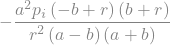

In [20]:
𝜎_rrpi = 𝜎_rr.subs({po: 0}).expand()
𝜎_rrpi.factor()                              # stress 𝜎_rr when po=0

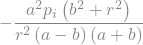

In [21]:
𝜎_𝜃𝜃pi = 𝜎_𝜃𝜃.subs({po: 0}).expand()
𝜎_𝜃𝜃pi.factor()                              # stress 𝜎_𝜃𝜃 when po=0

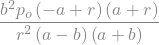

In [22]:
𝜎_rrpo = 𝜎_rr.subs({pi: 0}).expand()
𝜎_rrpo.factor()                              # stress 𝜎_rr when pi=0

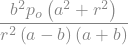

In [23]:
𝜎_𝜃𝜃po = 𝜎_𝜃𝜃.subs({pi: 0}).expand()
𝜎_𝜃𝜃po.factor()                              # stress 𝜎_𝜃𝜃 when pi=0

In [41]:
#print(𝜎_rrpo.factor()) #print(𝜎_𝜃𝜃po.factor())
#𝜎_rrpo = b**2*p_o*(-a + r)*(a + r)/(r**2*(a - b)*(a + b))
#𝜎_𝜃𝜃po = b**2*p_o*(a**2 + r**2)/(r**2*(a - b)*(a + b))

##### Some important findings from the stress solution

We write down the stresses in the disk, when $p_i=0$, for further examination. 

\begin{equation} \label{eqDisk_po}
\begin{split}
𝜎_{rr}&=\frac{b^{2} (r^2 - a^2) }{r^{2} (a^2 - b^2)} p_{o} \;\;\; \text{ always negative (in compression)} \\
𝜎_{𝜃𝜃}&=\frac{b^{2} (r^2 + a^2) }{r^{2} (a^2 - b^2)} p_{o} \;\;\; \text{ always positive (in tension)}
\end{split}
\end{equation} 

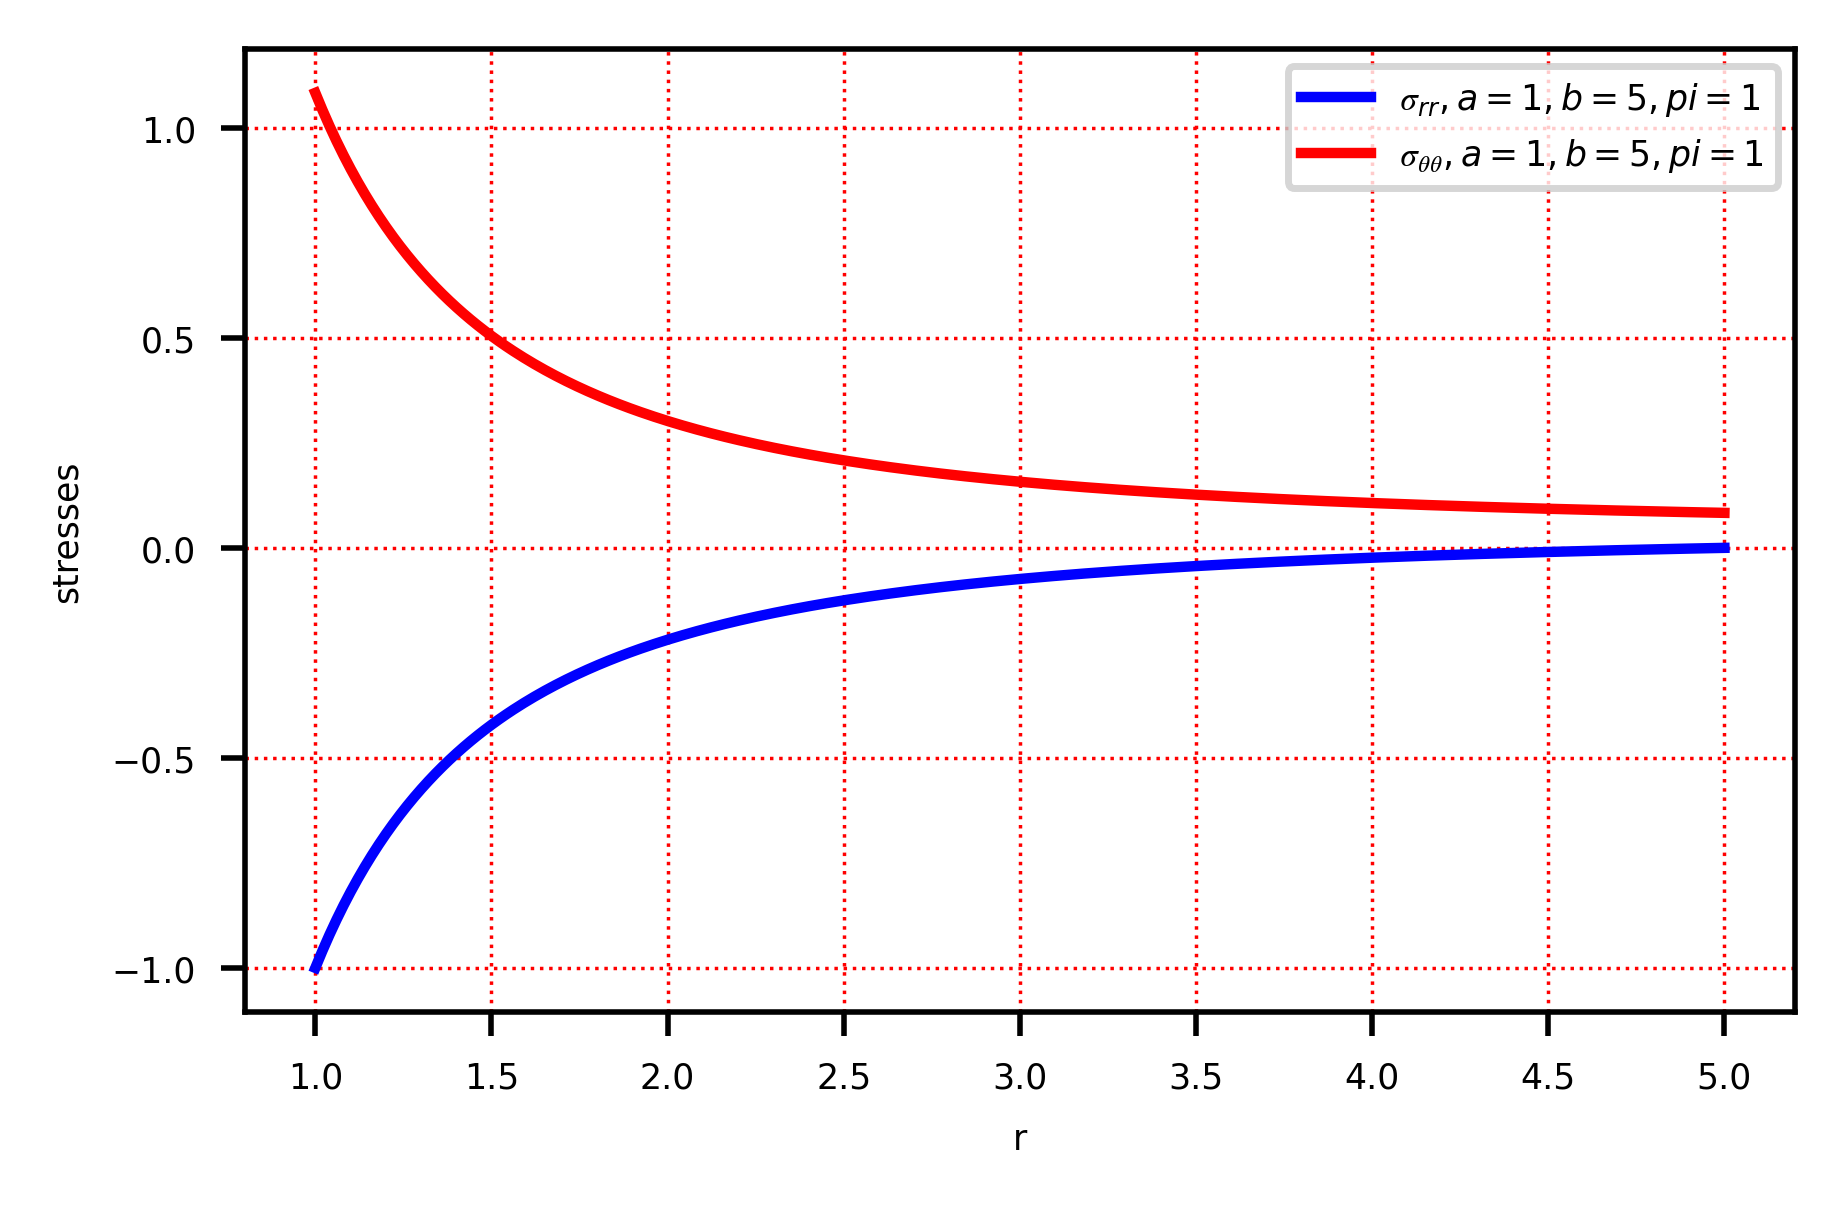

In [24]:
# SymPy expressions to Python functions: 
func1 = sp.lambdify(r, 𝜎_rrpi.subs({a:1, b:5, pi:1}), 'numpy')
func2 = sp.lambdify(r, 𝜎_𝜃𝜃pi.subs({a:1, b:5, pi:1}), 'numpy')

labels=[r'$𝜎_{rr},a=1,b=5,pi=1$',r'$𝜎_{𝜃𝜃},a=1,b=5,pi=1$']

x_data  = np.linspace(1, 5, 400)              #  r values for the plot
y_data = [func1(x_data), func2(x_data)]                 # funcs values 

gr.plot_fs(x_data, y_data, labels, 'r', 'stresses', 'Disk_pi')

We notice a few important findings from Eq.(\ref{eqDisk_po}):

1. $𝜎_{rr}$ is always negative, meaning that the disk is compressed in the axial direction. 

2. $𝜎_{𝜃𝜃}$ is always positive, meaning that the disk is stretched in the hoop direction, known as the **hoop stress**.

3. $𝜎_{𝜃𝜃}$ has a maximum at the inner surface: 

\begin{equation} \label{eqHoopMax}
𝜎_{𝜃𝜃}^{max}=\frac{(a^2+b^2)p_i}{ b^2 - a^2}  
\end{equation} 

4. $𝜎_{𝜃𝜃}^{max}$ is always larger than $p_i$. It reduces with increasing $b$, but will never be reduced below $p_i$, however much material is added outside.

5. $𝜎_{𝜃𝜃}^{max}$ approaches $\infty$, when $b \to a$. This means that the hoop stress grows very fast with respect to the inner pressure, if the disk is very thin. This is why a balloon can be inflated effectively with the internal pressure. 

This solution of Eq.(\ref{eqDisk_po}) will be used later when studying stress concentration on a hole in plates.

##### Displacement solution

By substituting $c_0$ and $c_2$ into Eq.(\ref{equv}), we obtain the formula for the displacement. 

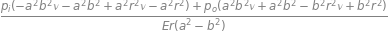

In [48]:
u_rpipo = u_rg.subs({c0:cs[c0], c2:cs[c2]}).expand()
u_rpipo.factor(pi, po)

Rearranging the terms in the result, we have

\begin{equation} \label{equvf}
\begin{split}
u_r&=\frac{1}{E(a^2 - b^2)} \bigg[ p_{i} \bigg( a^2 (𝜈-1)r - a^2 b^2 (1+𝜈)\frac{1}{r} \bigg) \\
&+ p_{o} \left(b^2 (1-𝜈) r+a^2 b^2 (1+𝜈)\frac{1}{r} \right) \bigg]
\end{split}
\end{equation} 

This formula allow us to conveniently set either $p_i$ or $p_o$ to zero. 